# Project - Predict the  amount of product purchase using  Mutiple  Linear Regression.

#   

# Importing the necessary packages and modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as seb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Reading the dataset

In [2]:
train_data = pd.read_csv('train.csv')
train_data.shape

(550068, 12)

# Processing the dataset

### 1. Checking for missing entries

In [3]:
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### 2. Filling the missing entries with the mode of each column

In [4]:
train_data = train_data.apply(lambda x : x.fillna(x.value_counts().index[0]))
train_data.isnull().sum()  # checking for null/missing values again

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### 3. Encoding the data set so as to make it easy for building machine learing model

In [5]:
label_enc = LabelEncoder()
data_enc = train_data

# encoding few string-contained columns
data_enc.Product_ID = label_enc.fit_transform(train_data.Product_ID)
data_enc.Gender = label_enc.fit_transform(train_data.Gender)
data_enc.Age = label_enc.fit_transform(train_data.Age)
data_enc.City_Category = label_enc.fit_transform(train_data.City_Category)
data_enc.Stay_In_Current_City_Years = label_enc.fit_transform(train_data.Stay_In_Current_City_Years)

data_enc.head(100)

User_ID  Product_ID  Gender  Age  Occupation  City_Category  \
0   1000001         672       0    0          10              0   
1   1000001        2376       0    0          10              0   
2   1000001         852       0    0          10              0   
3   1000001         828       0    0          10              0   
4   1000002        2734       1    6          16              2   
5   1000003        1831       1    2          15              0   
6   1000004        1745       1    4           7              1   
7   1000004        3320       1    4           7              1   
8   1000004        3604       1    4           7              1   
9   1000005        2631       1    2          20              0   
10  1000005        2398       1    2          20              0   
11  1000005         140       1    2          20              0   
12  1000005         307       1    2          20              0   
13  1000005        1355       1    2          20              0   
14  1000006        2203       0    5           9              0   
15  1000006        1798       0    5           9              0   
16  1000006        3598       0    5           9              0   
17  1000006         573       0    5           9              0   
18  1000007         362       1    3           1              1   
19  1000008        2382       1    2          12              2   
20  1000008        2096       1    2          12              2   
21  1000008        1469       1    2          12              2   
22  1000008        2029       1    2          12              2   
23  1000008        2036       1    2          12              2   
24  1000008        2909       1    2          12              2   
25  1000009        1264       1    2          17              2   
26  1000009         391       1    2          17              2   
27  1000009        1517       1    2          17              2   
28  1000009         765       1    2          17              2   
29  1000010         833       0    3           1              1   
..      ...         ...     ...  ...         ...            ...   
70  1000018        3522       0    1           3              1   
71  1000018        1803       0    1           3              1   
72  1000018        1423       0    1           3              1   
73  1000018        1035       0    1           3              1   
74  1000018        1093       0    1           3              1   
75  1000018         338       0    1           3              1   
76  1000018        2114       0    1           3              1   
77  1000018        1092       0    1           3              1   
78  1000018        3111       0    1           3              1   
79  1000018        1796       0    1           3              1   
80  1000018        3573       0    1           3              1   
81  1000018        1292       0    1           3              1   
82  1000018        1488       0    1           3              1   
83  1000018        1479       0    1           3              1   
84  1000018         432       0    1           3              1   
85  1000019        1034       1    0          10              0   
86  1000019        3255       1    0          10              0   
87  1000019        1186       1    0          10              0   
88  1000019        1167       1    0          10              0   
89  1000019        2399       1    0          10              0   
90  1000019        2383       1    0          10              0   
91  1000019        1156       1    0          10              0   
92  1000019        2392       1    0          10              0   
93  1000019         570       1    0          10              0   
94  1000019        1083       1    0          10              0   
95  1000019        2402       1    0          10              0   
96  1000019        2335       1    0          10              0   
97  1000021        2094       1    1          16   

# Declaring input and output variables

In [6]:
x = train_data.loc[:,train_data.columns != 'Purchase']
y = train_data.iloc[:,-1]

# Splitting the data into train and test sets

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(440054, 11)
(110014, 11)
(440054,)
(110014,)


# Fitting the data into Linear Regression model

In [8]:
linear_reg = LinearRegression()
linear_reg.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Predicting the output test values for input test values

In [9]:
ypred = linear_reg.predict(xtest)
ypred

array([11441.05566473,  5804.26278825,  9646.21595158, ...,
       11521.00830257, 12460.89044838, 10236.98824361])

# Comparing the actual output test values with the predicted output test values

In [10]:
ypred == ytest

41001     False
16151     False
507262    False
368698    False
353782    False
358687    False
301389    False
278980    False
47994     False
416377    False
266930    False
226794    False
525409    False
490544    False
139180    False
351374    False
194821    False
346419    False
360095    False
249040    False
347094    False
1398      False
148746    False
84873     False
147779    False
103865    False
470708    False
527931    False
435287    False
269847    False
          ...  
263941    False
271136    False
348867    False
219097    False
380213    False
187312    False
352136    False
323647    False
527436    False
333542    False
347436    False
166886    False
54012     False
521367    False
179177    False
361450    False
487327    False
451747    False
112244    False
175476    False
306466    False
532628    False
145199    False
232542    False
317652    False
168473    False
246358    False
105766    False
40384     False
181039    False
Name: Purchase, Length: 

# Generating the final report

In [11]:
print(np.mean(ypred))
print(np.mean(ytest))
print('difference : ', abs(np.mean(ypred) - np.mean(ytest)))
print('Coefficients: \n', linear_reg.coef_)
print('Variance score: %.2f' % linear_reg.score(xtest, ytest))  # 1 is the perfect prediction

9258.750644901918
9269.135110076899
difference :  10.384465174980505
Coefficients: 
 [ 1.23353386e-02 -3.93684010e-01  5.45085460e+02  1.22642851e+02
  6.86167261e+00  3.43390201e+02  1.11518795e+01 -5.65240410e+01
 -3.96345704e+02 -1.00005594e+01 -1.39028061e+02]
Variance score: 0.14


# Making a jointplot for the actual values vs. the predicted values

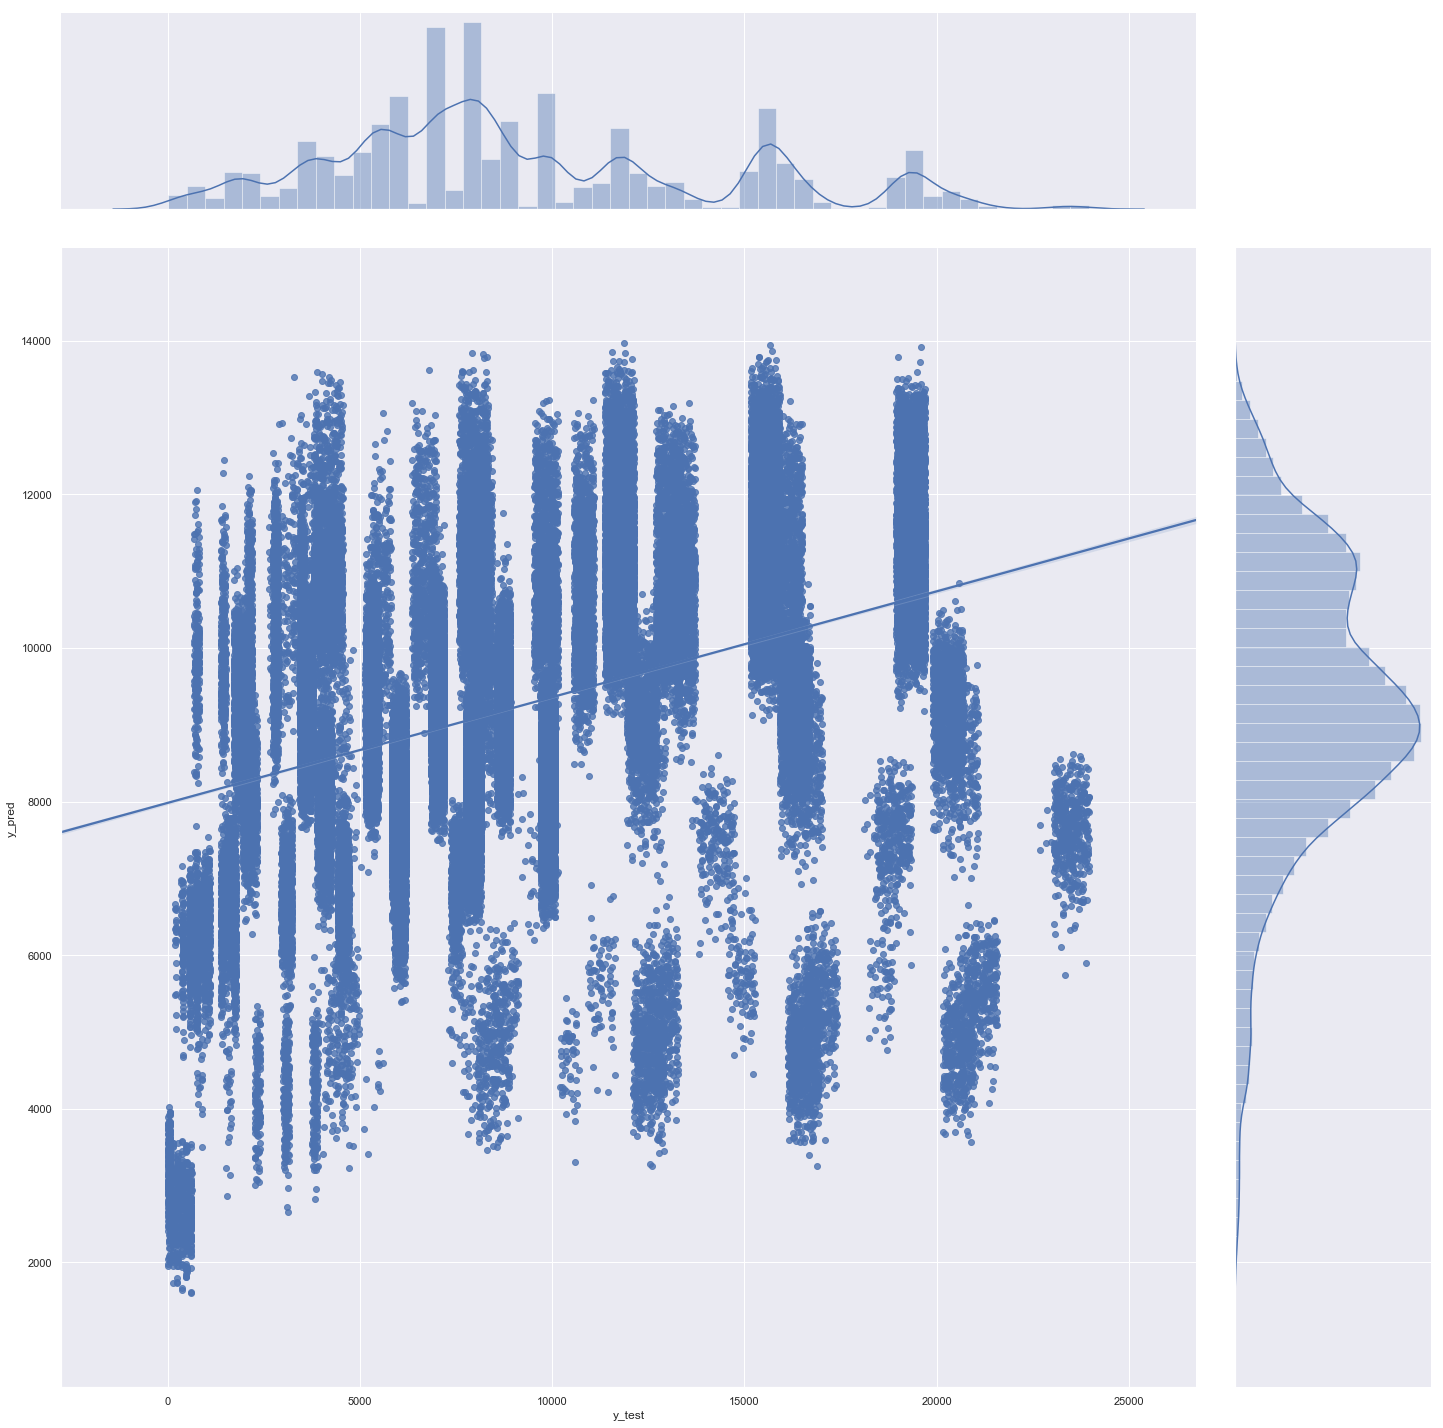

In [13]:
seb.set(style = "darkgrid")
df = pd.DataFrame({'y_pred' : ypred, 'y_test' : ytest})
g = seb.jointplot('y_test', 'y_pred', data = df, kind = 'reg', height = 20)